### SIMPLE REGRESSION

In [1]:
import tensorflow as tf
import numpy as n
import matplotlib.pyplot as plt
tf.__version__

'2.11.0'

### Inputs and Values

In [2]:
X = tf.constant(n.array([-7, -4, -1, 2, 5, 8, 11]),dtype=tf.float32)
y = tf.constant(n.arange(3,3*8,3),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.], dtype=float32)>)

In [3]:
type(X[0]) #.shape

tensorflow.python.framework.ops.EagerTensor

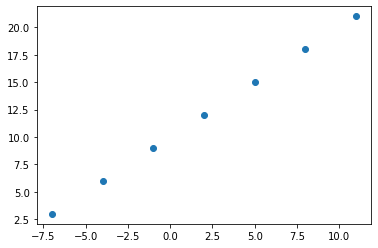

In [4]:
plt.scatter(X,y)

### Building the model

In [17]:
def createmodel():
    tf.random.set_seed(42)

    #lets build the model
    m = tf.keras.Sequential([
        tf.keras.Input(shape=(1,)),  #https://github.com/mrdbourke/tensorflow-deep-learning/discussions/256#discussioncomment-3045769
        tf.keras.layers.Dense(1)])

    #compile the model
    m.compile(loss = tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.SGD(),
            metrics = ['mae'])

    #fit the model -->training data
    #here it is X and y
    #m.fit(X , y, epochs=10) m.fit(tf.expand_dims(X, axis=-1), y, epochs=5)
    return m

In [12]:
m1 = createmodel()
m1 = m1.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 303ms/step - loss: 13.6367 - mae: 13.6367
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 13.4716 - mae: 13.4716
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 13.3065 - mae: 13.3065
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 13.1414 - mae: 13.1414
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 12.9763 - mae: 12.9763


In [15]:
#prediction of the model
m1.predict([14.0]) 
#this model is not giving accurate results. So a big model with more hidden layers is req

1/1 [==============================] - 0s 52ms/step


array([[-5.8928814]], dtype=float32)

### LARGE MODEL FROM PREVIOUS

In [22]:
m2 = createmodel()
m2.fit(tf.expand_dims(X,axis=-1), y, epochs=600)

Epoch 1/600
1/1 [==============================] - 0s 388ms/step - loss: 11.6259 - mae: 11.6259
Epoch 2/600
1/1 [==============================] - 0s 6ms/step - loss: 11.5759 - mae: 11.5759
Epoch 3/600
1/1 [==============================] - 0s 7ms/step - loss: 11.5259 - mae: 11.5259
Epoch 4/600
1/1 [==============================] - 0s 6ms/step - loss: 11.4759 - mae: 11.4759
Epoch 5/600
1/1 [==============================] - 0s 11ms/step - loss: 11.4259 - mae: 11.4259
Epoch 6/600
1/1 [==============================] - 0s 9ms/step - loss: 11.3759 - mae: 11.3759
Epoch 7/600
1/1 [==============================] - 0s 7ms/step - loss: 11.3259 - mae: 11.3259
Epoch 8/600
1/1 [==============================] - 0s 5ms/step - loss: 11.2759 - mae: 11.2759
Epoch 9/600
1/1 [==============================] - 0s 14ms/step - loss: 11.2259 - mae: 11.2259
Epoch 10/600
1/1 [==============================] - 0s 10ms/step - loss: 11.1759 - mae: 11.1759
Epoch 11/600
1/1 [==============================] - 0s

In [23]:
X,y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.], dtype=float32)>)

In [24]:
m2.predict([14.0])

1/1 [==============================] - 0s 66ms/step


array([[25.604156]], dtype=float32)

In [5]:
def create_bigmodel():    
    tf.random.set_seed(42)

    #lets build the model
    m = tf.keras.Sequential([
        tf.keras.Input(shape=(1,)),  #https://github.com/mrdbourke/tensorflow-deep-learning/discussions/256#discussioncomment-3045769
        tf.keras.layers.Dense(100, activation = 'relu'),
        tf.keras.layers.Dense(1)])

    #compile the model
    m.compile(loss = tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
            metrics = ['mae'])

    #fit
    m.fit(tf.expand_dims(X, axis=-1),y, epochs=100)
    
    return m

In [6]:
m3 = create_bigmodel()
m3.summary

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.0569 - mae: 12.0569
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6940 - mae: 10.6940
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 9.3675 - mae: 9.3675
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5056 - mae: 8.5056
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 7.6075 - mae: 7.6075
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 6.6616 - mae: 6.6616
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 5.6536 - mae: 5.6536
Epoch 8/100
1/1 [==============================] - 0s 37ms/step - loss: 4.5592 - mae: 4.5592
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 3.7860 - mae: 3.7860
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 3.8608 - mae: 3.8608
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - 

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000025D28D1E608>>

In [7]:
#predict
m3.predict([14.0])

1/1 [==============================] - 0s 170ms/step


array([[23.468512]], dtype=float32)

In [8]:
newX = tf.range(-100, 100, 4)
newY = newX + 10
newX, newY

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

### DIVIDE INTO 3 DATASETS 

 **Training data** --> 70 to 80 %
 
 **Validation data** --> 10 to 15 %

 **Testing data** --> 10 to 15 %

In [11]:
#dividing
xtraindata = newX[0:40]
xtestdata = newX[40:]

ytraindata = newY[0:40]
ytestdata = newY[40:]

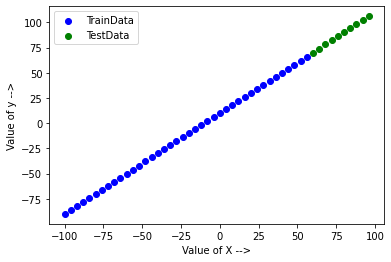

In [13]:
#visualize the data
plt.scatter(xtraindata, ytraindata, c='b', label = "TrainData")
plt.scatter(xtestdata, ytestdata, c='g', label = "TestData")
plt.xlabel("Value of X -->")
plt.ylabel("Value of y -->")
plt.legend()